In [1]:
# Imports etc.
import sys
sys.path.insert(1, '/home/yannik/vssil')
import yaml

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import torch

In [2]:
# Load data
with open('/home/yannik/vssil/results/transporter_walker_metrics.yml', 'r') as stream:
    transporter_metric_dict = yaml.load(stream, Loader=yaml.Loader)

with open('/home/yannik/vssil/results/ulosd_walker_metrics.yml', 'r') as stream:   
    ulosd_metric_dict = yaml.load(stream, Loader=yaml.Loader)

In [3]:
print(list(transporter_metric_dict.keys()))

['dist', 'smooth', 'track', 'visual']


In [4]:
transporter_df = pd.DataFrame(transporter_metric_dict, dtype=float)
ulosd_df = pd.DataFrame(ulosd_metric_dict, dtype=float)
transporter_df_melted = pd.melt(transporter_df)
ulosd_df_melted = pd.melt(ulosd_df)
combined_df_melted = pd.concat([transporter_df_melted, ulosd_df_melted], keys=['transporter', 'ulosd'])

In [5]:
combined_df_melted.reset_index(level=0, inplace=True)
combined_df_melted = combined_df_melted.rename(columns={"level_0": "method", "variable": "metric"}, errors="raise")
combined_df_melted

,method,metric,value
0,transporter,dist,0.139823
1,transporter,dist,0.142003
2,transporter,dist,0.133821
3,transporter,dist,0.136977
4,transporter,dist,0.139323
...,...,...,...
43,ulosd,visual,0.057832
44,ulosd,visual,0.051869
45,ulosd,visual,0.049858
46,ulosd,visual,0.053855


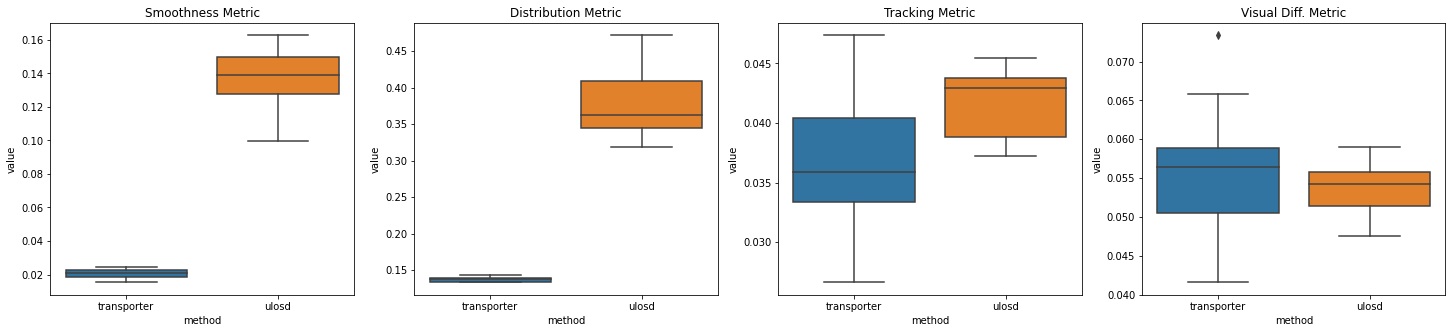

In [6]:
fig, ax = plt.subplots(1, 4, figsize=(25, 5))
sns.boxplot(x='method', y='value', data=combined_df_melted[combined_df_melted['metric']=='smooth'], ax=ax[0])
ax[0].set_title('Smoothness Metric')
sns.boxplot(x='method', y='value', data=combined_df_melted[combined_df_melted['metric']=='dist'], ax=ax[1])
ax[1].set_title('Distribution Metric')
sns.boxplot(x='method', y='value', data=combined_df_melted[combined_df_melted['metric']=='track'], ax=ax[2])
ax[2].set_title('Tracking Metric')
sns.boxplot(x='method', y='value', data=combined_df_melted[combined_df_melted['metric']=='visual'], ax=ax[3])
ax[3].set_title('Visual Diff. Metric')
plt.show()